# **Air Quality Prediction Using Machine Learning**

🔹Project focuses on predicting air quality using machine learning techniques. Have built a model to analyze and forecast air pollution levels based on historical data. This project involves steps as how to preprocess time-series data, build predictive models, and evaluate their performance.

**🔹 Data Understanding**

In [ ]:
import pandas as pd

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/air_pollution_data.csv")

In [ ]:
# Viewing the first few rows
print("🔹 First 5 rows of the dataset:")
print(df.head())

🔹 First 5 rows of the dataset:
        city        date  aqi       co     no    no2      o3    so2   pm2_5  \
0  Ahmedabad  30-11-2020    5   520.71   2.38  16.28  130.18  47.68   65.96   
1  Ahmedabad  01-12-2020    5  1682.28   7.71  54.84    0.73  21.70  120.95   
2  Ahmedabad  02-12-2020    5  1815.80  16.54  49.35    0.17  23.84  133.47   
3  Ahmedabad  03-12-2020    5  2296.45  41.57  40.10    0.00  35.76  150.37   
4  Ahmedabad  04-12-2020    5  2189.64  23.92  58.95    0.02  28.13  160.79   

     pm10    nh3  
0   72.13   8.36  
1  154.53  27.36  
2  172.63  28.12  
3  202.15  36.48  
4  205.80  40.53  


In [ ]:
# To Display data types and non-null counts
print("\n🔹 Dataset info:")
print(df.info())


🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB
None


In [ ]:
# To Display basic statistics
print("\n🔹 Statistical summary:")
print(df.describe(include='all'))


🔹 Statistical summary:
             city        date           aqi            co           no  \
count       23504       23504  23504.000000  23504.000000  23504.00000   
unique         26         904           NaN           NaN          NaN   
top     Ahmedabad  25-05-2023           NaN           NaN          NaN   
freq          904          26           NaN           NaN          NaN   
mean          NaN         NaN      3.920354   1113.224543      6.00554   
std           NaN         NaN      1.415490   1401.770372     24.50272   
min           NaN         NaN      1.000000    173.570000      0.00000   
25%           NaN         NaN      3.000000    447.270000      0.00000   
50%           NaN         NaN      5.000000    700.950000      0.00000   
75%           NaN         NaN      5.000000   1188.280000      0.27000   
max           NaN         NaN      5.000000  23071.290000    457.76000   

                 no2            o3           so2         pm2_5          pm10  \
count  

In [ ]:
# To Check for missing values
print("\n🔹 Missing values in each column:")
print(df.isnull().sum())


🔹 Missing values in each column:
city     0
date     0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


**🔹 Data Preprocessing**

In [ ]:
import numpy as np

In [ ]:
# To Load the dataset and treat invalid strings as NaN
df = pd.read_csv("air_pollution_data.csv", na_values=["NA", "N/A", "missing", "-", " ", "null"])

In [ ]:
# To Handle missing values by filling numeric columns with column mean
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Impute missing numeric values with the column mean
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

In [ ]:
# To Convert 'date' (in DD-MM-YYYY format) to Datetime with time component
df['Datetime'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Format as YYYY-MM-DD HH:MM:SS
df['Datetime'] = df['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
df.sample()

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,Datetime
14714,Jorapokhar,07-08-2021,5,2002.72,50.07,62.38,0.0,93.46,199.56,217.86,2.57,2021-08-07 00:00:00


In [ ]:
# To Drop the original 'date' column
df.drop(columns=['date'], inplace=True)

In [ ]:
# Final check
print("✅ Missing values after filling with mean:")
print(df.isnull().sum())

print("\n🕒 Sample Datetime values:")
print(df['Datetime'].head())

✅ Missing values after filling with mean:
city        0
aqi         0
co          0
no          0
no2         0
o3          0
so2         0
pm2_5       0
pm10        0
nh3         0
Datetime    0
dtype: int64

🕒 Sample Datetime values:
0    2020-11-30 00:00:00
1    2020-12-01 00:00:00
2    2020-12-02 00:00:00
3    2020-12-03 00:00:00
4    2020-12-04 00:00:00
Name: Datetime, dtype: object


**🔹Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      23504 non-null  object 
 1   aqi       23504 non-null  int64  
 2   co        23504 non-null  float64
 3   no        23504 non-null  float64
 4   no2       23504 non-null  float64
 5   o3        23504 non-null  float64
 6   so2       23504 non-null  float64
 7   pm2_5     23504 non-null  float64
 8   pm10      23504 non-null  float64
 9   nh3       23504 non-null  float64
 10  Datetime  23504 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
# To Define the features to scale
features = ['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
X = df[features]

In [ ]:
# Initializing StandardScaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Creating a new DataFrame with scaled data
df_scaled = pd.DataFrame(X_scaled, columns=features)

In [ ]:
# To Add back non-scaled columns if needed (e.g., for grouping, plotting)
df_scaled['city'] = df['city']
df_scaled['Datetime'] = df['Datetime']

# To Preview scaled data
print("✅ Scaled data sample:")
print(df_scaled.head())

✅ Scaled data sample:
        aqi        co        no       no2        o3       so2     pm2_5  \
0  0.762753 -0.422699 -0.147968 -0.339185  2.981724  1.324337 -0.240750   
1  0.762753  0.405963  0.069564  1.153150 -1.076132  0.239258  0.164873   
2  0.762753  0.501216  0.429939  0.940678 -1.093686  0.328637  0.257224   
3  0.762753  0.844112  1.451480  0.582688 -1.099015  0.826487  0.381883   
4  0.762753  0.767913  0.731137  1.312214 -1.098388  0.507813  0.458744   

       pm10       nh3       city             Datetime  
0 -0.309913 -0.210906  Ahmedabad  2020-11-30 00:00:00  
1  0.203719  0.872062  Ahmedabad  2020-12-01 00:00:00  
2  0.316544  0.915380  Ahmedabad  2020-12-02 00:00:00  
3  0.500554  1.391886  Ahmedabad  2020-12-03 00:00:00  
4  0.523306  1.622729  Ahmedabad  2020-12-04 00:00:00  


In [ ]:
df_scaled.to_csv("scaled_air_pollution_data.csv", index=False)

**🔹Model Development**

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# To Rename columns for Prophet
df_prophet = df[['Datetime', 'aqi']].copy()
df_prophet.rename(columns={'Datetime': 'ds', 'aqi': 'y'}, inplace=True)

In [ ]:
# To Convert to datetime format
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y-%m-%d %H:%M:%S')

# To Sort by datetime
df_prophet.sort_values('ds', inplace=True)

In [ ]:
# To Split data into training and testing (e.g., last 10% for testing)
split_index = int(len(df_prophet) * 0.9)
train = df_prophet.iloc[:split_index]
test = df_prophet.iloc[split_index:]

# To Initialize and train the Prophet model
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8vpms9do/5_tnwpdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8vpms9do/78iir4s8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96614', 'data', 'file=/tmp/tmp8vpms9do/5_tnwpdy.json', 'init=/tmp/tmp8vpms9do/78iir4s8.json', 'output', 'file=/tmp/tmp8vpms9do/prophet_modelghyoct5u/prophet_model-20250805172136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# To Create future dataframe for prediction
future = model.make_future_dataframe(periods=len(test), freq='D')  # daily forecast
forecast = model.predict(future)

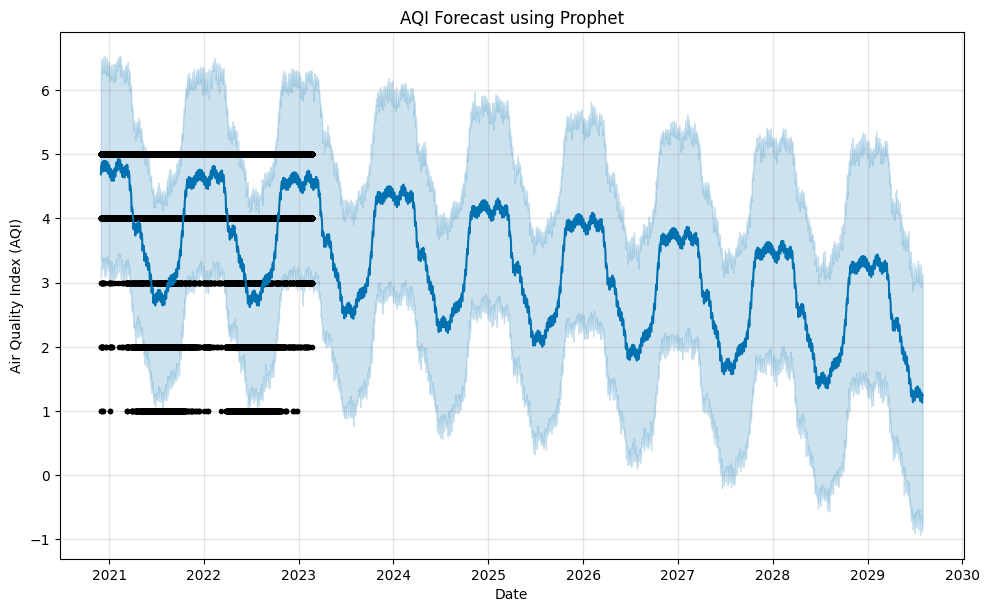

In [ ]:
# Step 7: To Plot forecast
fig1 = model.plot(forecast)
plt.title("AQI Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Air Quality Index (AQI)")
plt.show()

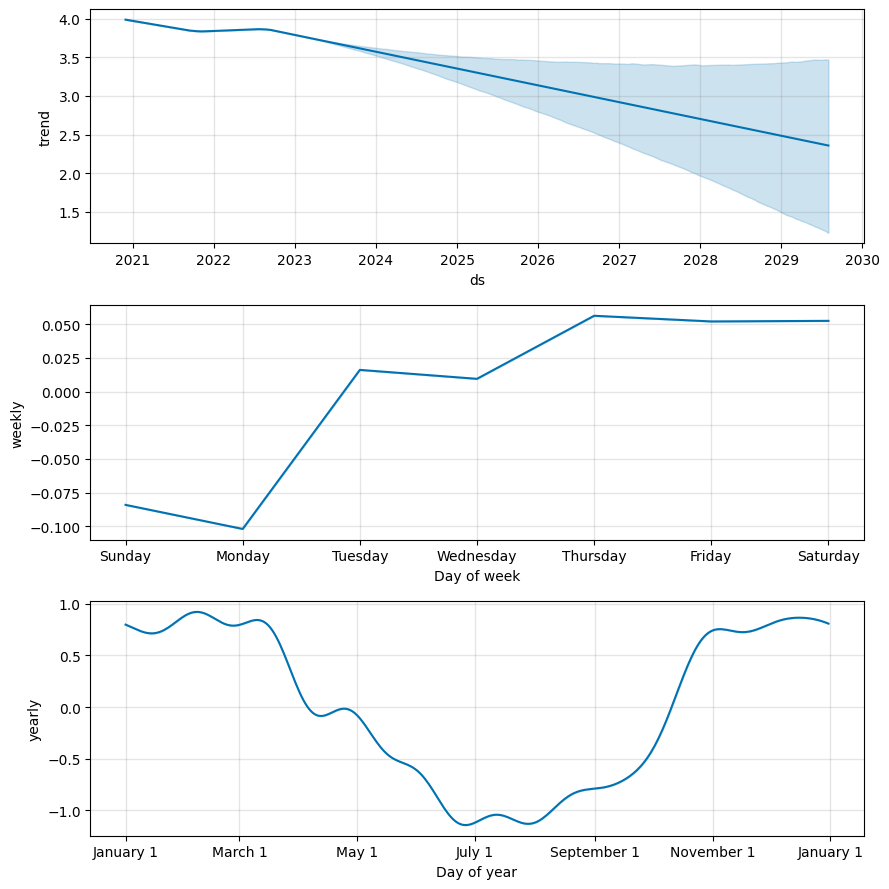

In [ ]:
# To Plot components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()

**🔹Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# To Merge forecasted and actual AQI on datetime
# Prophet returns forecasted values in 'yhat'
# To align with the actual test data

# To Trim forecast to match test period
forecast_test = forecast.iloc[-len(test):][['ds', 'yhat']].reset_index(drop=True)
actual_test = test.reset_index(drop=True)

In [ ]:
# Evaluation Metrics
mae = mean_absolute_error(actual_test['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(actual_test['y'], forecast_test['yhat']))
r2 = r2_score(actual_test['y'], forecast_test['yhat'])

print(f"🔍 Model Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²    = {r2:.4f}")

🔍 Model Evaluation:
MAE  = 1.32
RMSE = 1.58
R²    = -0.7200


/tmp/ipython-input-3278154943.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


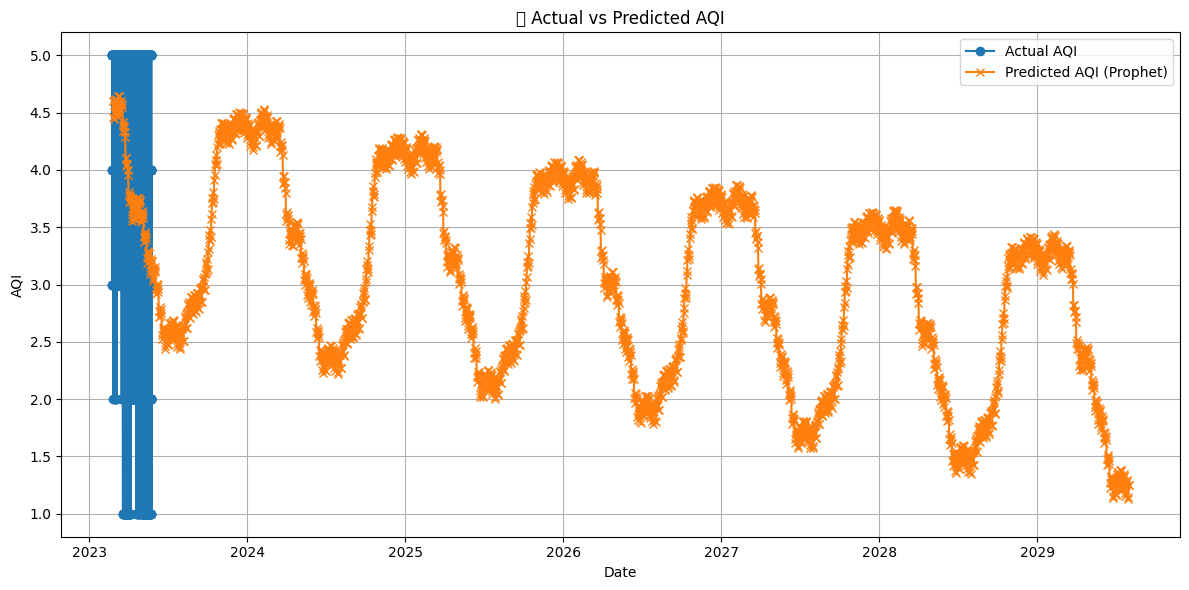

In [ ]:
# To Plot actual vs predicted AQI
plt.figure(figsize=(12, 6))
plt.plot(actual_test['ds'], actual_test['y'], label='Actual AQI', marker='o')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted AQI (Prophet)', marker='x')
plt.title("📊 Actual vs Predicted AQI")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()

⚠️ **Interpretation of R² < 0:**

An R² of -0.72 means:


*   The model fails to capture the variance in AQI.

*   Prophet may not be modeling the trend/seasonality well — possibly due to:

- Insufficient temporal patterns in the AQI series

- High noise or irregular sampling

- Forecasting over too short or erratic a horizon